<a href="https://colab.research.google.com/github/RohanDubeySF/Training/blob/master/Feature%20Engineering/Outlier-handling/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("https://github.com/krishnaik06/Feature-Engineering-Live-sessions/raw/refs/heads/master/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Count'>

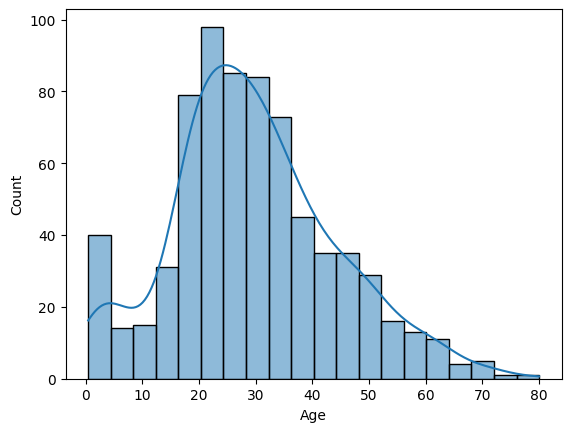

In [ ]:
sns.histplot(data['Age'],kde=True)

<Axes: xlabel='Age'>

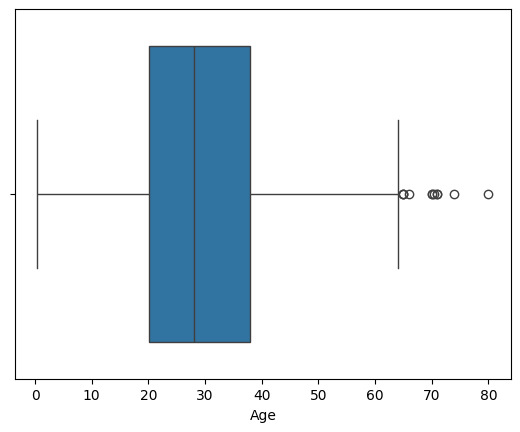

In [ ]:
sns.boxplot(data,x=data['Age'])

In [ ]:
  data['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
uppper_boundary=data['Age'].mean() + 3* data['Age'].std()
lower_boundary=data['Age'].mean() - 3* data['Age'].std()
print(lower_boundary), print(uppper_boundary),print(data['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [ ]:
data.loc[data['Age']>=73,'Age']=73

In [ ]:
data['Age'].describe()

,Age
count,714.000000
mean,29.687913
std,14.490589
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,73.000000


<Axes: xlabel='Age'>

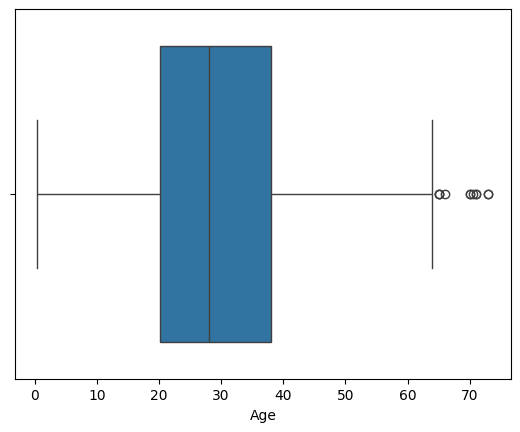

In [ ]:
sns.boxplot(data,x=data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

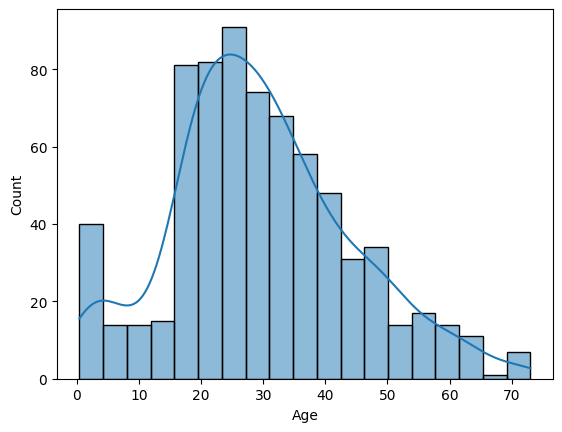

In [ ]:
sns.histplot(data['Age'],kde=True)

#Whne data is not Normal distributed

<Axes: xlabel='Fare'>

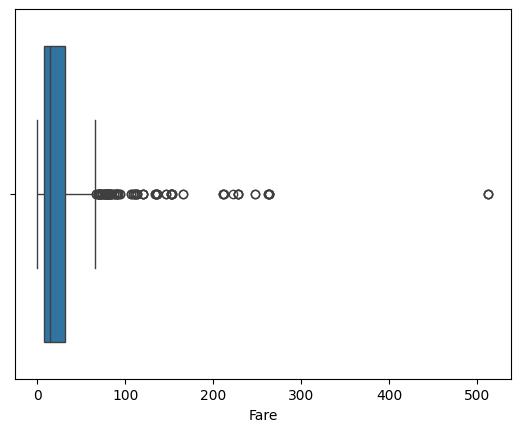

In [ ]:
sns.boxplot(data,x=data['Fare'])

In [ ]:
# When data is not extremely skewed
q1=data[col].quantile(0.25)
q3=data[col].quantile(0.75)
iqr=q3-q1
max=q3+(1.5*iqr)
min=q1-(1.5*iqr)
data.drop(data[(data[col]<min) | (data[col]>=max)].index,inplace=True)

In [ ]:
# When data is Extremely skewed
def extreme(data,col):
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iqr=q3-q1
  max=q3+(3*iqr)
  min=q1-(3*iqr)
  data.drop(data[(data[col]<min) | (data[col]>max)].index,inplace=True)